In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
sys.path.insert(0, '..\\nVision')

In [3]:
import pca as pca

In [4]:
data = pd.read_excel('../data/fullParamLTO.xlsx')

In [ ]:
pca.pca_analysis(data)

In [5]:
int_feats = pca.interaction_features(data)

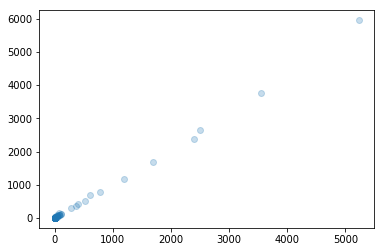

In [6]:
plt.scatter(int_feats.iloc[0], int_feats.iloc[1], alpha=0.25)

In [ ]:
sns.pairplot()

In [7]:
scaler = preprocessing.StandardScaler().fit(int_feats)

In [8]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
data_s = scaler.transform(int_feats)
data_s = pd.DataFrame(data=data_s)

In [10]:
data_s.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,-0.882433,2.747175,-1.079856,-1.073369,-1.145644,0.593359,0.388319,-0.752339,-0.703498,-0.238389,...,-0.756084,-0.742592,-0.259706,0.134325,-0.707801,-0.258681,0.136323,-0.274141,-0.030192,0.022509
1,0.511685,-0.932787,1.690851,-0.955746,0.872872,-0.089350,0.365070,1.314696,1.310383,-0.242613,...,1.320781,1.340370,-0.203515,0.517981,1.314873,-0.201938,0.519967,-0.275642,0.061192,0.274493
2,1.784181,-0.830698,-1.079856,-0.773526,0.872872,-1.181685,-0.076659,1.488281,1.479503,-0.293133,...,1.501163,1.521282,-0.248785,-0.698488,1.490548,-0.247652,-0.696462,-0.293106,-0.585775,-1.013325
3,-0.660831,-0.224432,1.689790,-0.089459,0.872872,0.696800,0.597559,0.113569,0.140142,-0.320416,...,0.097971,0.113970,-0.312804,0.296543,0.123969,-0.312301,0.298536,-0.302158,-0.111341,0.131911
4,0.183266,0.551340,0.219396,-1.067064,-1.145644,-0.296232,0.179079,-0.085943,-0.054239,-0.241506,...,-0.100851,-0.085436,-0.243202,0.994834,-0.069665,-0.242015,0.996804,-0.275250,0.373283,1.182836


In [ ]:
sns.pairplot(data_s)

In [11]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=37)
data_pca= pca.fit(data_s).transform(data_s)
data_pca = pd.DataFrame(data=data_pca)

In [ ]:
sns.pairplot(data_pca)

In [17]:
pca.explained_variance_ratio_

array([2.86085058e-01, 2.13681479e-01, 1.61315608e-01, 1.29562578e-01,
       8.82704808e-02, 5.72615275e-02, 2.58872024e-02, 1.17649562e-02,
       7.06653215e-03, 6.36077123e-03, 3.39387418e-03, 2.20748988e-03,
       1.70168044e-03, 1.29365149e-03, 1.14663818e-03, 9.21024484e-04,
       5.70059111e-04, 5.14101512e-04, 3.79983486e-04, 2.08363745e-04,
       1.71756422e-04, 9.17481318e-05, 5.58896480e-05, 4.00069283e-05,
       1.55162199e-05, 1.20177697e-05, 7.59396685e-06, 4.55147674e-06,
       3.27997285e-06, 2.16370226e-06, 9.34659721e-07, 5.88387451e-07,
       4.65244084e-07, 3.24975111e-07, 7.46039415e-08, 2.81197337e-08,
       1.97405767e-33])

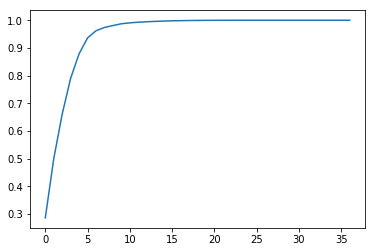

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [24]:
comps = pd.DataFrame(pca.components_)

In [26]:
comps;

In [52]:
np.abs(comps[0]).argmax();

c:\users\tbrau\miniconda3\envs\ecshackweek\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


In [60]:
order = (-np.abs(comps[0])).argsort(axis=-1, kind='quicksort', order=None)

In [63]:
for feat in int_feats.columns[order]:
    print(feat)

CNF:Thickness (um)
CB:Binder
CB
CB:Electrode Weight (mg)
CB:Capacity (mAh/g_electrode)
AM:BinderType
CB:Porosity (%v)
AM:Active Material Weight (mg)
AM:Capacity (mAh/g_electrode)
CNF
CNF:Binder
AM:Binder
Thickness (um)
CB:Thickness (um)
CNF:BinderType
CNF:CNF
CB:Theoritical Capacity (mAh)
BinderType
CB:BinderType
AM:AM
AM:Porosity (%v)
AM
Electrode Weight (mg)
AM:Theoritical Capacity (mAh)
AM:CB
Active Material Weight (mg)
CB:Active Material Weight (mg)
CB:CNF
Binder
Capacity (mAh/g_electrode)
Theoritical Capacity (mAh)
Porosity (%v)
AM:Electrode Weight (mg)
AM:CNF
CNF:Electrode Weight (mg)
AM:Thickness (um)
CB:CB


In [19]:
from matplotlib import cm

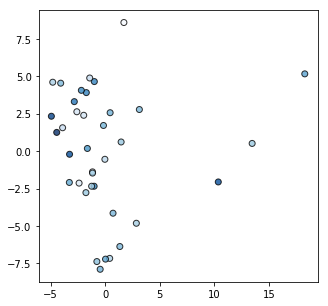

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(data_pca[0], data_pca[1], c=data_pca[2], cmap=cm.Blues, alpha=0.8, edgecolor='k')
#ax.set_xlim([-7,7])
#ax.set_ylim([-7,7])